In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [101]:
df = pd.read_excel('facebook.xlsx')

In [102]:
df.duplicated().sum()

0

In [103]:
df = df.drop(['title', 'in', 'images', 'url', 'hits', 'supports', 'byImageUrl', 'thankfuls'], axis=1)

In [104]:
df = df.drop([17151,17150,17149])

In [105]:
df.head()

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys
0,Visit us at https://asiatimes.com/Premium con...,Asia Times,2022-12-22 16:24:43,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"With a capacity of over 68,000 seats, Al Bayt ...",HISTORY,2022-12-09 18:00:00,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0
2,Visit us at https://asiatimes.com/Premium con...,Asia Times,2022-11-16 13:24:45,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0
3,What a game! #Argentina defeated the defending...,Hisense,2022-12-19 08:23:59,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0
4,UPDATE: Spain run riot over Costa Rica to go t...,Daily Monitor,2022-11-24 02:01:26,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0


In [106]:
df.isna().sum()

content     0
from        0
date        0
by          0
comments    0
likes       0
shares      0
loves       0
wows        0
hahas       0
sads        0
angrys      0
dtype: int64

In [107]:
df.dtypes

content             object
from                object
date        datetime64[ns]
by                  object
comments           float64
likes              float64
shares             float64
loves              float64
wows               float64
hahas              float64
sads               float64
angrys             float64
dtype: object

In [108]:
df.columns

Index(['content', 'from', 'date', 'by', 'comments', 'likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys'],
      dtype='object')

In [109]:
columns_aggr = ['likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys']

# Create a new column with the sum of selected columns
df['interactions'] = df[columns_aggr].sum(axis=1)

In [110]:
reacts_sorted = df.sort_values(by='interactions', ascending = False)

In [111]:
reacts_sorted.head()

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
9286,We've had some special opening ceremonies �Can...,FIFA World Cup,2022-11-20 03:21:32,FIFA World Cup,48691.0,3656165.0,339926.0,1167869.0,14544.0,12343.0,2212.0,3738.0,5196797.0
10999,Can't wait for this great World Cup semi-final...,Mesut Özil,2022-12-15 02:20:37,Mesut Özil,54445.0,1779102.0,29761.0,868409.0,1603.0,6512.0,1727.0,392.0,2687506.0
14934,"Son muchos los recuerdos, buenos momentos y no...",Leo Messi,2022-11-22 04:06:08,Leo Messi,65977.0,527424.0,36493.0,513938.0,681.0,4366.0,802.0,217.0,1083921.0
10461,World Cup final � @cruzbeckhamRoad to 2022 #fi...,David Beckham,2022-12-18 23:07:03,David Beckham,7642.0,814887.0,6148.0,177540.0,679.0,514.0,60.0,153.0,999981.0
7237,Thank you for an unforgettable visit and a Wor...,Zlatan Ibrahimović,2022-12-22 00:08:16,Zlatan Ibrahimović,10244.0,713547.0,3239.0,166533.0,529.0,1429.0,99.0,253.0,885629.0


In [112]:
print(f"There are {len(df['by'].unique())} different people/pages that posted on facebook in this dataset")

There are 2215 different people/pages that posted on facebook in this dataset


In [113]:
df['date'] = df['date'].dt.date

In [114]:
df['content'] = df['content'].str.lower()
df.head()

,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,interactions
0,visit us at https://asiatimes.com/premium con...,Asia Times,2022-12-22,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,"with a capacity of over 68,000 seats, al bayt ...",HISTORY,2022-12-09,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,190.0
2,visit us at https://asiatimes.com/premium con...,Asia Times,2022-11-16,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0
3,what a game! #argentina defeated the defending...,Hisense,2022-12-19,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,225.0
4,update: spain run riot over costa rica to go t...,Daily Monitor,2022-11-24,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,241.0


In [115]:
df = df.sort_values(by='date', inplace = True)

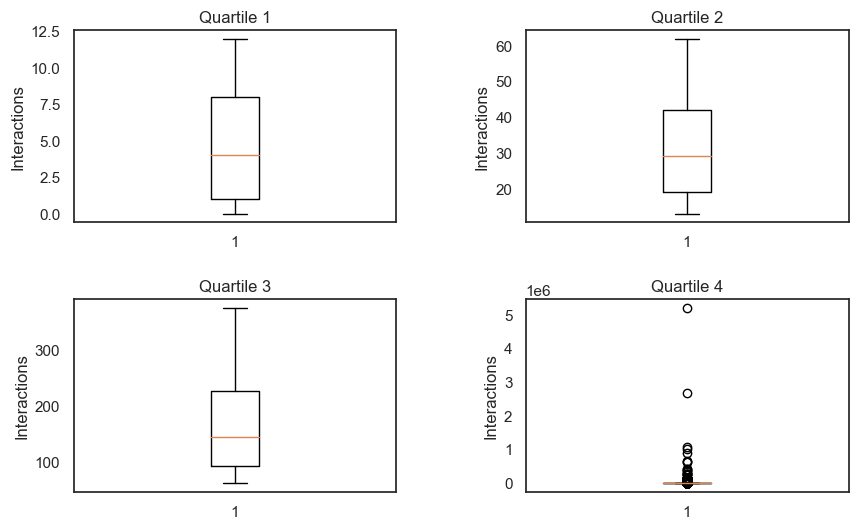

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4) 

# Calculate quartiles
q1 = reacts_sorted['interactions'].quantile(0.25)
q2 = reacts_sorted['interactions'].quantile(0.5)
q3 = reacts_sorted['interactions'].quantile(0.75)

# Create boxplots for each quartile
axes[0, 0].boxplot(reacts_sorted['interactions'][reacts_sorted['interactions'] <= q1])
axes[0, 0].set_title('Quartile 1')
axes[0, 1].boxplot(reacts_sorted['interactions'][(reacts_sorted['interactions'] > q1) & (reacts_sorted['interactions'] <= q2)])
axes[0, 1].set_title('Quartile 2')
axes[1, 0].boxplot(reacts_sorted['interactions'][(reacts_sorted['interactions'] > q2) & (reacts_sorted['interactions'] <= q3)])
axes[1, 0].set_title('Quartile 3')
axes[1, 1].boxplot(reacts_sorted['interactions'][reacts_sorted['interactions'] > q3])
axes[1, 1].set_title('Quartile 4')

# Set y-axis labels
for ax in axes.flat:
    ax.set_ylabel('Interactions')

# Show the plot
plt.show()

In [ ]:
correlation_matrix = df[['comments', 'likes', 'shares', 'loves',
       'wows', 'hahas', 'sads', 'angrys']].corr()

In [ ]:
sns.set(style='white')  # Set style
plt.figure(figsize=(8, 6))  # Set figure size

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head()

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

In [ ]:
df['content'] = df['content'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words]))

In [ ]:
df.head()